In [17]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def extract_license_plate(image_path):

    image = cv2.imread(image_path)
    
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply GaussianBlur to reduce noise and help with edge detection
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # Canny edge detection
    edges = cv2.Canny(blurred, 50, 150)
    
    # Find contours
    contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Filter to find potential license plate regions
    min_area = 500
    potential_plates = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]
    
    # Sort by area in descending order
    potential_plates = sorted(potential_plates, key=cv2.contourArea, reverse=True)[:5]
    
    for plate in potential_plates:
        epsilon = 0.02 * cv2.arcLength(plate, True)
        approx = cv2.approxPolyDP(plate, epsilon, True)
        
        if len(approx) == 4:
            # Draw the rectangular bounds
            cv2.drawContours(image, [approx], -1, (0, 255, 0), 2)
            
            # Extract ROI within rectangular bounds
            x, y, w, h = cv2.boundingRect(plate)
            license_plate_roi = image[y:y + h, x:x + w]
            
            return license_plate_roi


input/1.jpg 26.06821060180664 ms
input/2.jpg 23.545265197753906 ms
input/3.jpg 27.563095092773438 ms


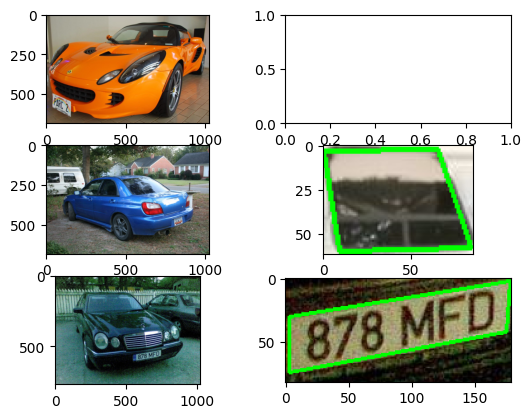

In [76]:
import time

input_images = ["input/1.jpg", "input/2.jpg", "input/3.jpg"]

f, plots = plt.subplots(3,2)
position = 0

for image in input_images:
    plots[position, 0].imshow(cv2.cvtColor(cv2.imread(image), cv2.COLOR_BGR2RGB))
    
    start = time.time()
    plate = extract_license_plate(image)
    end = time.time();
    print(f"{image} {(end-start) * 1000} ms")
    
    if plate is not None:
        plots[position, 1].imshow(plate)
    
    position += 1
    